<a href="https://colab.research.google.com/github/PhanQuangHuy123/B-i-1_AI_-Phan-Quang-Huy-20146254/blob/main/Exercise_Fuzzy_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Patients Management System using Fuzzy Logic: An easier and dynamic appointment system

In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=212b66e02cee6b5b7cf2c57cc8dbcea5118fde7596008dd798ed7fb03b115544
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


22.041666666666657


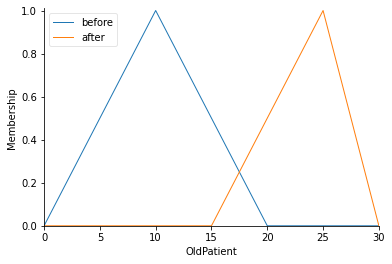

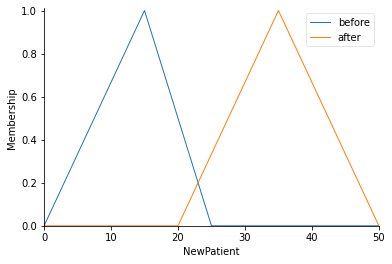

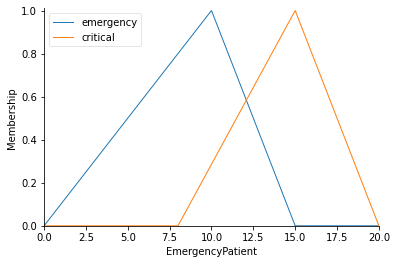

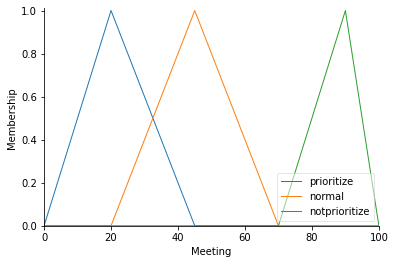

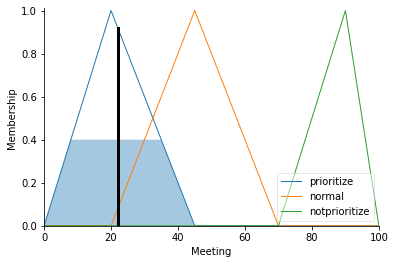

In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

OldPatient = ctrl.Antecedent(np.arange(0,31,1),'OldPatient')
NewPatient = ctrl.Antecedent(np.arange(0,51,1),'NewPatient')
EmergencyPatient = ctrl.Antecedent(np.arange(0,21,1),'EmergencyPatient')
Meeting = ctrl.Consequent(np.arange(0,101,1),'Meeting')

OldPatient['before']=fuzz.trimf(OldPatient.universe,[0,10,20])
OldPatient['after']=fuzz.trimf(OldPatient.universe,[15,25,30])

NewPatient['before']=fuzz.trimf(NewPatient.universe,[0,15,25])
NewPatient['after']=fuzz.trimf(NewPatient.universe,[20,35,50])

EmergencyPatient['emergency']=fuzz.trimf(EmergencyPatient.universe,[0,10,15])
EmergencyPatient['critical']=fuzz.trimf(EmergencyPatient.universe,[8,15,20])

Meeting['prioritize']=fuzz.trimf(Meeting.universe,[0,20,45])
Meeting['normal']=fuzz.trimf(Meeting.universe,[20,45,70])
Meeting['notprioritize']=fuzz.trimf(Meeting.universe,[70,90,100])


OldPatient.view()
NewPatient.view()
EmergencyPatient.view()
Meeting.view()


rule1=ctrl.Rule(OldPatient['before'] & NewPatient['before'] & EmergencyPatient['emergency'], Meeting['notprioritize'])
rule2=ctrl.Rule(OldPatient['before'] & NewPatient['after'] & EmergencyPatient['emergency'], Meeting['notprioritize'])
rule3=ctrl.Rule(OldPatient['after'] & NewPatient['before'] & EmergencyPatient['emergency'], Meeting['normal'])
rule4=ctrl.Rule(OldPatient['after'] & NewPatient['after'] & EmergencyPatient['emergency'], Meeting['prioritize'])

rule5=ctrl.Rule(OldPatient['before'] & NewPatient['before'] & EmergencyPatient['critical'], Meeting['normal'])
rule6=ctrl.Rule(OldPatient['before'] & NewPatient['after'] & EmergencyPatient['critical'], Meeting['prioritize'])
rule7=ctrl.Rule(OldPatient['after'] & NewPatient['before'] & EmergencyPatient['critical'], Meeting['prioritize'])
rule8=ctrl.Rule(OldPatient['after'] & NewPatient['after'] & EmergencyPatient['critical'], Meeting['prioritize'])

meeting_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8])
meetingDr = ctrl.ControlSystemSimulation(meeting_ctrl)
meetingDr.input['OldPatient']=10
meetingDr.input['NewPatient'] = 40
meetingDr.input['EmergencyPatient'] = 18
meetingDr.compute()
print(meetingDr.output['Meeting'])
Meeting.view(sim=meetingDr)